In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from matplotlib.pyplot import figure
import os
sns.set()

In [2]:
print(os.getcwd())
df= pd.read_csv("BANCOS_B1.csv", encoding="latin1", sep=";")

D:\Documents\MyGoogleDrive_Desk\csv ifdata\BANCOS.B1


In [3]:
#transformar data em index de data
df['data'] = pd.to_datetime(df['data'], format="%Y%m")
#df.set_index("data",inplace=True, drop=True)

In [4]:
#Arrumar valores separados por virgula
df['valor']= df['valor'].str.replace(",", ".")
df['valor'] = pd.to_numeric(df['valor'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132216 entries, 0 to 132215
Data columns (total 5 columns):
data        132216 non-null datetime64[ns]
id_banco    132216 non-null int64
nome        132216 non-null object
variavel    132216 non-null object
valor       132216 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.0+ MB


In [6]:
df.head(13)

,data,id_banco,nome,variavel,valor
0,2000-01-01,0,BANCO DO BRASIL S.A.,IF.DATA_Capt,8.642988e+10
1,2000-01-01,0,BANCO DO BRASIL S.A.,IF.DATA_DCap,-6.566507e+08
2,2000-01-01,0,BANCO DO BRASIL S.A.,IF.DATA_JCP,0.000000e+00
3,2000-01-01,0,BANCO DO BRASIL S.A.,IF.DATA_OpC,2.122170e+10
4,2000-01-01,0,BANCO DO BRASIL S.A.,IF.DATA_PartLuc,0.000000e+00
5,2000-01-01,0,BANCO DO BRASIL S.A.,IF.DATA_RdOC,4.623594e+08
6,2000-01-01,208,BRB - BANCO DE BRASILIA S.A.,IF.DATA_Capt,9.904284e+08
7,2000-01-01,208,BRB - BANCO DE BRASILIA S.A.,IF.DATA_DCap,-7.744032e+06
8,2000-01-01,208,BRB - BANCO DE BRASILIA S.A.,IF.DATA_JCP,0.000000e+00
9,2000-01-01,208,BRB - BANCO DE BRASILIA S.A.,IF.DATA_OpC,5.215207e+08


<h1 style="color: red">Quantidade Nomes Diferentes:</h1>

In [7]:
nomes = df['nome'].drop_duplicates().reset_index(drop=True)
nomes.count()
#nomes[1]

175

## Últimos Nomes

In [8]:
#df[['id_banco','nome']].drop_duplicates().reset_index(drop=True)
#ultimos_nomes = df[df['data'].dt.year == 2019][['id_banco','nome']]
ultimos_nomes = df[df['data'].dt.year == 2019][['id_banco']]
ultimos_nomes.drop_duplicates().count()

id_banco    100
dtype: int64

<h1 style="color: red">Quantidade de Identificadores das IFs</h1>

In [9]:
ids= df['id_banco'].drop_duplicates().reset_index(drop=True)
ids.count()

100

In [10]:
par_nome_id_banco = df[['nome','id_banco']].drop_duplicates()
par_nome_id_banco[par_nome_id_banco['nome']== 'CECM DOS MEDICOS DE CHAPECO LTDA']
def get_id_banco(nome):
    id = par_nome_id_banco[par_nome_id_banco['nome']== nome]['id_banco']
    return id.values[0]
#get_id_banco('FIAT')

<h1 style="color: red">Nossa conta vai levar em consideração a IF pelo nome (556) ou pelo identificador (100)
que eu imagino que seja o grupo?</h1>

<h1 style="color: red">Olha a quantidade de nomes diferentes por identificador:</h1>

[[]]

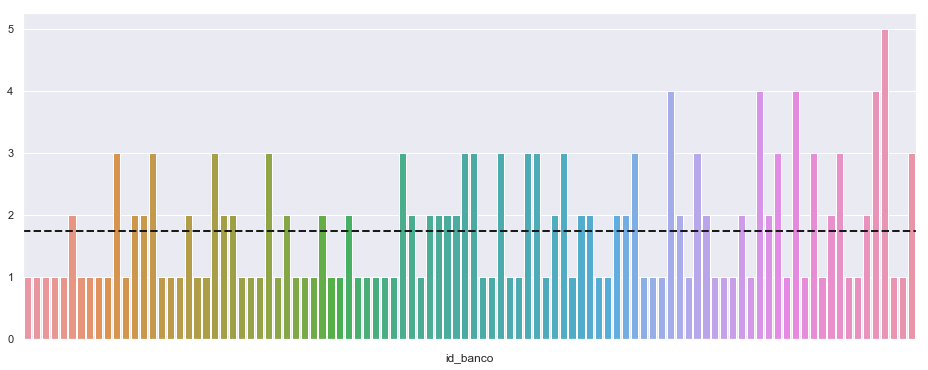

In [11]:
unique_names = df[['id_banco','nome']].drop_duplicates()
unique_names.sort_values(by=['id_banco'], inplace=True)
unique_names
#10 6 9 3
figure(figsize=(16, 6))
x = unique_names.groupby('id_banco').count().index
y = unique_names.groupby('id_banco').count().values.reshape(-1,)
g0=sns.barplot(x, y)
plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=2)
g0.set(xticklabels=[])

# Variáveis

In [12]:
df['variavel'].drop_duplicates()

0       IF.DATA_Capt
1       IF.DATA_DCap
2        IF.DATA_JCP
3        IF.DATA_OpC
4    IF.DATA_PartLuc
5       IF.DATA_RdOC
Name: variavel, dtype: object

<ul>
    <li>RdOC: Receitas com operações de crédito</li>
    <li>OpC: Operações de crédito</li>
    <li>Capt: Captações</li>
    <li>Dcap: Despesas de captação de crédito</li>
    <li>JCP: juro sobre capital próprio</li>
    <li>PartLuc: sobra líquida</li>
    <li style="color:red">OpCmed: média entre o mês no ano e o mesmo mês do ano anterior</li>
</ul>

<h1 style="color: red">Está correto dizer que a fórmula é a seguinte?</h1>

<h2 style="color:green">
$spread_{coop}=\left(\frac{RdOC_{t}}{\frac{OpC_{t}+OpC_{t-12}}{2}}\right)-
\left(\frac{DCap_{t}}{\frac{Capt_{t}+Capt_{t-12}}{2}}\right) - 
\left(\frac{PartLuc_{t} + JCP_{t}} 
{\frac {\left(\frac{OpC_{t} + OpC_{t - 12}}{2}\right)-\left(\frac{Capt_{t} + Capt_{t-12}}{2}\right)}{2}}\right)$
</h2>

<h1 style="color: red">Na imagem que tu tinhas mandado esse termo:
    $\left(
        \frac
            {SobraLiq_{i} + JCP_{t}}
            {
                \frac
                    {OpC_{med} - Capt_{med}}
                    {2}
            }
    \right)$<br>
    tem um 'i' que não deu pra entender o que é.
</h1>

<h1 style="color: red">Pelo que eu entendi do teu comentário o termo $OpC_{med}$ e $Capt_{med}$ seriam:</h1>

<h1 style="color: green">$OpC_{med} = \frac{OpC_{t} + OpC_{t - 12}}{2}$<h1>

<h1 style="color: green">$Capt_{med}= \frac{Capt_{t} + Capt_{t-12}}{2}$</h1>

<h1 style="color: red">Já que se tratam de médias entre meses com um ano de diferença.</h1>

In [13]:
ids[0]

0

In [14]:
df[df['id_banco']==ids[0]][['nome','id_banco']].drop_duplicates()

,nome,id_banco
0,BANCO DO BRASIL S.A.,0


# Pivot

## Pivot pelo nome

def pivot_IF(nome_IF):
    pivot = df[df['nome']== nome_IF].pivot(index='data', columns='variavel',values='valor')
    pivot['OpC_off_1'] = pivot['IF.DATA_OpC'].shift(1)
    pivot['OpC_off_12'] = pivot['IF.DATA_OpC'].shift(12)
    pivot['Capt_off_1'] = pivot['IF.DATA_Capt'].shift(1)
    pivot['Capt_off_12'] = pivot['IF.DATA_Capt'].shift(12)
    pivot['taxApl'] = pivot['IF.DATA_RdOC'] / ((pivot['IF.DATA_OpC'] + pivot['OpC_off_1'])/2)
    pivot['taxCapt'] = pivot['IF.DATA_DCap'] / ((pivot['IF.DATA_Capt'] + pivot['Capt_off_1'])/2)
    pivot['spread_banc'] = pivot['taxApl'] +  pivot['taxCapt'] # a captação tem sinal negativo
    cols=['spread_banc','taxApl','taxCapt','IF.DATA_DCap', 'IF.DATA_JCP','IF.DATA_PartLuc', 'IF.DATA_RdOC',
     'IF.DATA_OpC','OpC_off_1', 'OpC_off_12',
     'IF.DATA_Capt', 'Capt_off_1', 'Capt_off_12']
    return pivot[cols]
pivot_IF(nomes[0])

## Pivot pelo id

In [15]:
pd.Series([-1,-2,-3]).sum()

-6

<h2 style="color:green">
<p>t é o ano</p>
$spread_{coop}=\left(\frac{RdOC_{t}}{\frac{OpC_{t}+OpC_{t-1}}{2}}\right)-
\left(\frac{DCap_{t}}{\frac{Capt_{t}+Capt_{t-1}}{2}}\right) - 
\left(\frac{PartLuc_{t} + JCP_{t}} 
{\frac {\left(\frac{OpC_{t} + OpC_{t - 1}}{2}\right)-\left(\frac{Capt_{t} + Capt_{t-1}}{2}\right)}{2}}\right)$
</h2>

<h2 style="color:green">
$
se \left(\frac{OpC_{t} + OpC_{t - 1}}{2}\right) > \left(\frac{Capt_{t} + Capt_{t-1}}{2}\right)
$
    <br><br>
$
\left(\frac{PartLuc_{t} + JCP_{t}}
{\frac {\left(\frac{OpC_{t} + OpC_{t - 1}}{2}\right)-\left(\frac{Capt_{t} + Capt_{t-1}}{2}\right)}{2}}\right)$
será negativo
    <br><br>
Do contrário, teremos um número positivo e, portanto, um spread na cooperativa menor que o cálculo do spread bancário.
</h2>

In [16]:
ids[0]

0

In [17]:
def pivot_IF(id):
    #print(id)
    pivot = df[df['id_banco']== id].pivot(index='data', columns='variavel',values='valor')
    pivot = pivot.groupby(pivot.index.year).sum()
    pivot['id'] = id
    pivot['OpC_off_1'] = pivot['IF.DATA_OpC'].shift(1)
    #pivot['OpC_off_12'] = pivot['IF.DATA_OpC'].shift(12)
    pivot['Capt_off_1'] = pivot['IF.DATA_Capt'].shift(1)
    #pivot['Capt_off_12'] = pivot['IF.DATA_Capt'].shift(12)
    pivot['taxApl'] = pivot['IF.DATA_RdOC'] / ((pivot['IF.DATA_OpC'] + pivot['OpC_off_1'])/2)
    pivot['taxCapt'] = pivot['IF.DATA_DCap'] / ((pivot['IF.DATA_Capt'] + pivot['Capt_off_1'])/2)
    pivot['spread_banc'] = pivot['taxApl'] +  pivot['taxCapt'] # a captação tem sinal negativo
    # termo coop é negativo se a media de operações de crédito for maior que
    # a média de captação 
    cols=['id','spread_banc', 'taxApl','taxCapt','IF.DATA_DCap', 'IF.DATA_RdOC',
     'IF.DATA_OpC','OpC_off_1', 'IF.DATA_Capt', 'Capt_off_1']
    return pivot[cols]
pivot_IF(ids[0])

variavel,id,spread_banc,taxApl,taxCapt,IF.DATA_DCap,IF.DATA_RdOC,IF.DATA_OpC,OpC_off_1,IF.DATA_Capt,Capt_off_1
data,,,,,,,,,,
2000,0,NaN,NaN,NaN,-2.613429e+10,2.009838e+10,2.798977e+11,NaN,1.102286e+12,NaN
2001,0,0.066030,0.092439,-0.026409,-3.133852e+10,3.085073e+10,3.875887e+11,2.798977e+11,1.271068e+12,1.102286e+12
2002,0,0.071901,0.103121,-0.031220,-4.544355e+10,4.467230e+10,4.788178e+11,3.875887e+11,1.640139e+12,1.271068e+12
2003,0,0.061245,0.096947,-0.035702,-6.177155e+10,5.357763e+10,6.264763e+11,4.788178e+11,1.820217e+12,1.640139e+12
2004,0,0.058305,0.080961,-0.022655,-4.273430e+10,5.640754e+10,7.669817e+11,6.264763e+11,1.952364e+12,1.820217e+12
2005,0,0.049889,0.074958,-0.025069,-5.043037e+10,6.318240e+10,9.188353e+11,7.669817e+11,2.070955e+12,1.952364e+12
2006,0,0.044404,0.068758,-0.024354,-5.488947e+10,7.045168e+10,1.130420e+12,9.188353e+11,2.436609e+12,2.070955e+12
2007,0,0.042355,0.064135,-0.021780,-5.948340e+10,8.370380e+10,1.479827e+12,1.130420e+12,3.025695e+12,2.436609e+12
2008,0,0.038518,0.062993,-0.024475,-8.362694e+10,1.089834e+11,1.980353e+12,1.479827e+12,3.807920e+12,3.025695e+12


In [18]:
test_if = pivot_IF(ids[1])
test_if.columns

Index(['id', 'spread_banc', 'taxApl', 'taxCapt', 'IF.DATA_DCap',
       'IF.DATA_RdOC', 'IF.DATA_OpC', 'OpC_off_1', 'IF.DATA_Capt',
       'Capt_off_1'],
      dtype='object', name='variavel')

In [19]:
def monta_csv():
    cols=['id','spread_banc', 'taxApl','taxCapt','IF.DATA_DCap', 'IF.DATA_RdOC',
     'IF.DATA_OpC','OpC_off_1', 'IF.DATA_Capt', 'Capt_off_1']
    total = pd.DataFrame(columns=cols)
    for n in ids:
        total = total.append(pivot_IF(n))
    return total
completo = monta_csv()
#completo.to_csv("arrumado_b1.csv", encoding="latin1", sep=";")

In [20]:
ids.count()

100

In [21]:
len(completo['id'].unique())

100

In [22]:
completo[completo['id']== ids[0]]

variavel,id,spread_banc,taxApl,taxCapt,IF.DATA_DCap,IF.DATA_RdOC,IF.DATA_OpC,OpC_off_1,IF.DATA_Capt,Capt_off_1
2000,0,NaN,NaN,NaN,-2.613429e+10,2.009838e+10,2.798977e+11,NaN,1.102286e+12,NaN
2001,0,0.066030,0.092439,-0.026409,-3.133852e+10,3.085073e+10,3.875887e+11,2.798977e+11,1.271068e+12,1.102286e+12
2002,0,0.071901,0.103121,-0.031220,-4.544355e+10,4.467230e+10,4.788178e+11,3.875887e+11,1.640139e+12,1.271068e+12
2003,0,0.061245,0.096947,-0.035702,-6.177155e+10,5.357763e+10,6.264763e+11,4.788178e+11,1.820217e+12,1.640139e+12
2004,0,0.058305,0.080961,-0.022655,-4.273430e+10,5.640754e+10,7.669817e+11,6.264763e+11,1.952364e+12,1.820217e+12
2005,0,0.049889,0.074958,-0.025069,-5.043037e+10,6.318240e+10,9.188353e+11,7.669817e+11,2.070955e+12,1.952364e+12
2006,0,0.044404,0.068758,-0.024354,-5.488947e+10,7.045168e+10,1.130420e+12,9.188353e+11,2.436609e+12,2.070955e+12
2007,0,0.042355,0.064135,-0.021780,-5.948340e+10,8.370380e+10,1.479827e+12,1.130420e+12,3.025695e+12,2.436609e+12
2008,0,0.038518,0.062993,-0.024475,-8.362694e+10,1.089834e+11,1.980353e+12,1.479827e+12,3.807920e+12,3.025695e+12
2009,0,0.032411,0.054450,-0.022040,-9.528760e+10,1.215530e+11,2.484377e+12,1.980353e+12,4.839044e+12,3.807920e+12


In [23]:
completo.columns

Index(['id', 'spread_banc', 'taxApl', 'taxCapt', 'IF.DATA_DCap',
       'IF.DATA_RdOC', 'IF.DATA_OpC', 'OpC_off_1', 'IF.DATA_Capt',
       'Capt_off_1'],
      dtype='object', name='variavel')

In [24]:
completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1883 entries, 2000 to 2019
Data columns (total 10 columns):
id              1883 non-null object
spread_banc     1683 non-null float64
taxApl          1689 non-null float64
taxCapt         1776 non-null float64
IF.DATA_DCap    1883 non-null float64
IF.DATA_RdOC    1883 non-null float64
IF.DATA_OpC     1883 non-null float64
OpC_off_1       1783 non-null float64
IF.DATA_Capt    1883 non-null float64
Capt_off_1      1783 non-null float64
dtypes: float64(9), object(1)
memory usage: 161.8+ KB


In [33]:
completo[completo.spread_banc.isna()]

variavel,id,spread_banc,taxApl,taxCapt,IF.DATA_DCap,IF.DATA_RdOC,IF.DATA_OpC,OpC_off_1,IF.DATA_Capt,Capt_off_1
2000,0,NaN,NaN,NaN,-2.613429e+10,2.009838e+10,2.798977e+11,NaN,1.102286e+12,NaN
2000,208,NaN,NaN,NaN,-3.022548e+08,7.122103e+08,6.514350e+09,NaN,1.206125e+10,NaN
2000,10045,NaN,NaN,NaN,-1.763834e+10,2.514861e+10,3.086948e+11,NaN,6.835714e+11,NaN
2000,10069,NaN,NaN,NaN,-9.267209e+09,1.290181e+10,1.867496e+11,NaN,4.520888e+11,NaN
2000,10083,NaN,NaN,NaN,-6.148030e+09,4.176127e+09,5.586456e+10,NaN,2.038075e+11,NaN
2000,20107,NaN,NaN,NaN,-6.998296e+08,1.474758e+08,2.369301e+09,NaN,2.694243e+10,NaN
2000,20152,NaN,NaN,NaN,-7.764801e+08,1.311307e+09,1.342660e+10,NaN,2.215334e+10,NaN
2000,30159,NaN,NaN,NaN,-5.176713e+08,6.759253e+08,8.934928e+09,NaN,1.839876e+10,NaN
2000,30173,NaN,NaN,NaN,-1.728210e+09,2.029791e+09,2.861734e+10,NaN,6.838568e+10,NaN
2000,30290,NaN,NaN,NaN,-2.446920e+08,3.719294e+08,2.650473e+09,NaN,4.716743e+09,NaN


In [25]:
completo.head()

variavel,id,spread_banc,taxApl,taxCapt,IF.DATA_DCap,IF.DATA_RdOC,IF.DATA_OpC,OpC_off_1,IF.DATA_Capt,Capt_off_1
2000,0,NaN,NaN,NaN,-2.613429e+10,2.009838e+10,2.798977e+11,NaN,1.102286e+12,NaN
2001,0,0.066030,0.092439,-0.026409,-3.133852e+10,3.085073e+10,3.875887e+11,2.798977e+11,1.271068e+12,1.102286e+12
2002,0,0.071901,0.103121,-0.031220,-4.544355e+10,4.467230e+10,4.788178e+11,3.875887e+11,1.640139e+12,1.271068e+12
2003,0,0.061245,0.096947,-0.035702,-6.177155e+10,5.357763e+10,6.264763e+11,4.788178e+11,1.820217e+12,1.640139e+12
2004,0,0.058305,0.080961,-0.022655,-4.273430e+10,5.640754e+10,7.669817e+11,6.264763e+11,1.952364e+12,1.820217e+12


In [26]:
completo.spread_banc.dropna()

2001    0.066030
2002    0.071901
2003    0.061245
2004    0.058305
2005    0.049889
2006    0.044404
2007    0.042355
2008    0.038518
2009    0.032411
2010    0.035279
2011    0.031200
2012    0.029007
2013    0.025378
2014    0.020804
2015    0.026067
2016    0.018129
2017    0.018458
2018    0.025868
2019    0.017509
2001    0.088142
2002    0.092411
2003    0.104805
2004    0.096831
2005    0.105501
2006    0.099299
2007    0.093805
2008    0.085404
2009    0.106847
2010    0.079740
2011    0.072125
          ...   
2016   -0.002395
2017    0.007356
2018    0.034667
2019    0.040303
2012    0.087420
2013    0.039998
2014    0.047331
2015    0.083711
2016    0.048169
2017    0.050261
2018    0.070725
2019    0.040838
2014    0.058369
2015    0.039147
2016    0.035160
2017    0.027079
2018    0.046291
2019    0.029916
2016    0.008943
2017    0.007165
2018    0.002129
2019    0.003127
2016    0.079873
2017    0.047764
2018    0.054474
2019    0.036948
2018    0.017325
2019    0.0099

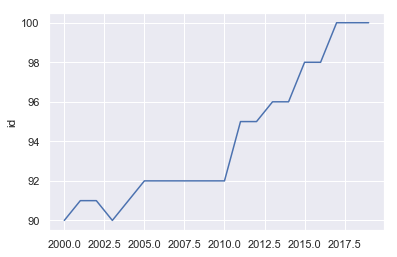

In [27]:
sns.lineplot(completo.index.unique(), completo.id.groupby(completo.index).count())

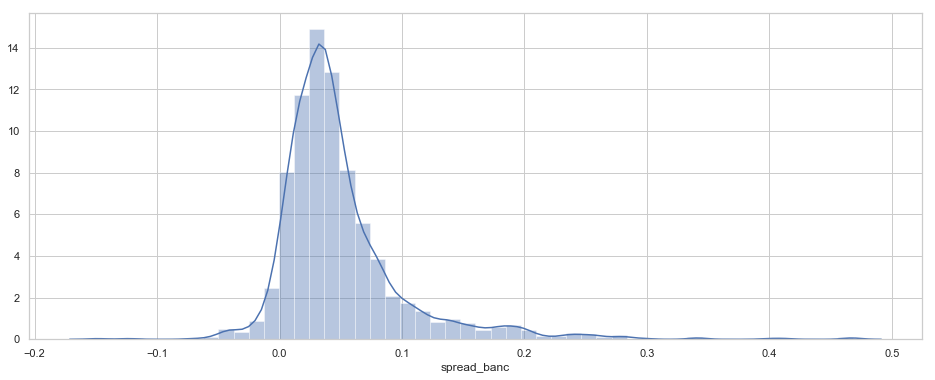

In [44]:
fig = plt.gcf()
fig.set_size_inches(16, 6)
sns.set_style("whitegrid")
sns.distplot(completo[(completo.spread_banc.notna()) & 
                      (completo.spread_banc != np.inf) &
                     (completo.spread_banc != -np.inf)
                     & (completo.spread_banc < .5)].spread_banc)

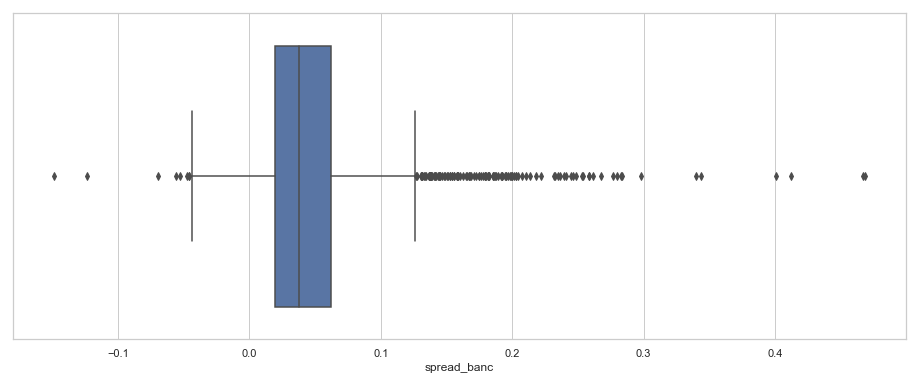

In [42]:
fig = plt.gcf()
fig.set_size_inches(16, 6)
sns.set_style("whitegrid")
sns.boxplot(completo[(completo.spread_banc.notna()) & 
                      (completo.spread_banc != np.inf) &
                     (completo.spread_banc != -np.inf)&
                    (completo.spread_banc < .5)].spread_banc)

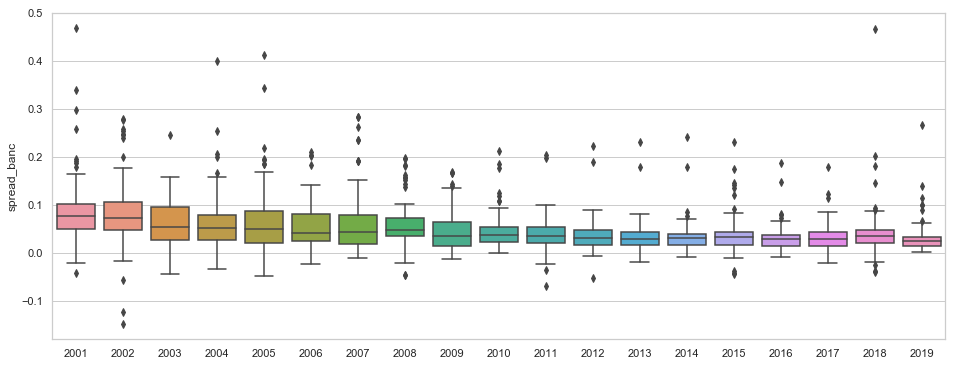

In [45]:
fig = plt.gcf()
fig.set_size_inches(16, 6)
sns.set_style("whitegrid")
sns.boxplot(completo[(completo.spread_banc.notna()) & 
                      (completo.spread_banc != np.inf) &
                     (completo.spread_banc != -np.inf)
                    & (completo.spread_banc < .5)].index,    
    completo[(completo.spread_banc.notna()) & 
                      (completo.spread_banc != np.inf) &
                     (completo.spread_banc != -np.inf)
            & (completo.spread_banc < .5)].spread_banc)

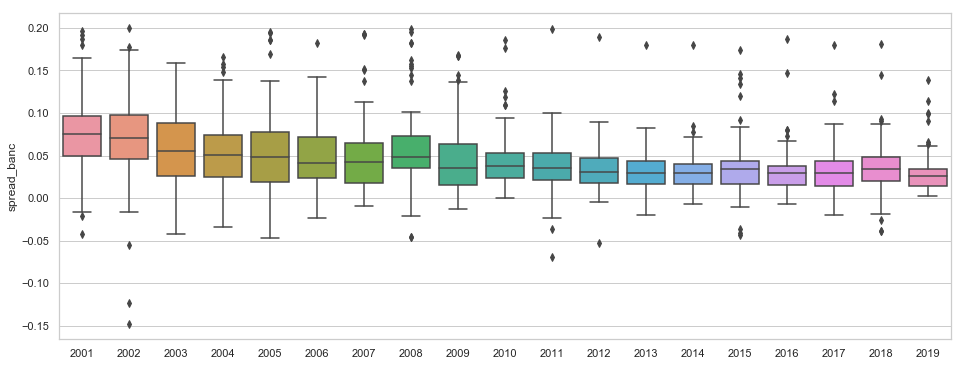

In [46]:
fig = plt.gcf()
fig.set_size_inches(16, 6)
sns.set_style("whitegrid")
sns.boxplot(completo[(completo.spread_banc.notna()) & 
                      (completo.spread_banc != np.inf) &
                     (completo.spread_banc != -np.inf)
                    & (completo.spread_banc < .2)].index,    
    completo[(completo.spread_banc.notna()) & 
                      (completo.spread_banc != np.inf) &
                     (completo.spread_banc != -np.inf)
            & (completo.spread_banc < .2)].spread_banc)

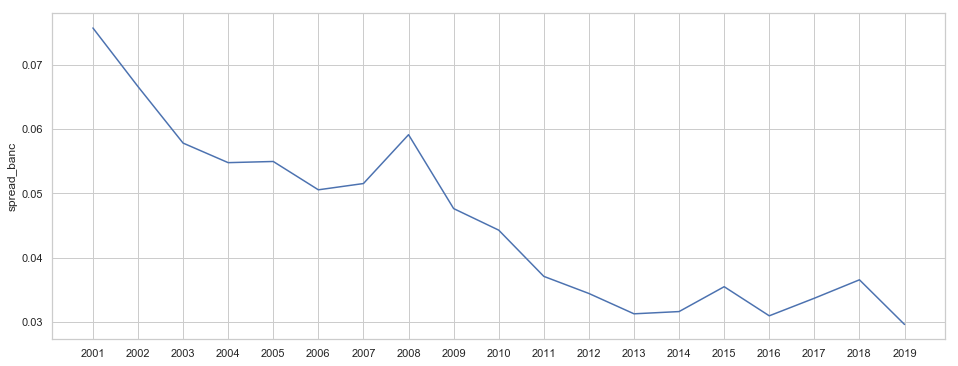

In [69]:
fig = plt.gcf()
fig.set_size_inches(16, 6)
sns.set_style("whitegrid")
filtrado = completo[(completo.spread_banc.notna()) & 
                      (completo.spread_banc != np.inf) &
                     (completo.spread_banc != -np.inf)
                    & (completo.spread_banc < .2)]
filtrado = filtrado.groupby(filtrado.index).mean()
sns.lineplot(filtrado.index.map(str), filtrado.spread_banc)

In [49]:
fig = plt.gcf()
fig.set_size_inches(16, 6)
sns.set_style("whitegrid")
sns.distplot(completo[(completo.spread_banc.notna()) & 
                      (completo.spread_banc != np.inf) &
                     (completo.spread_banc != -np.inf)
                    & (completo.spread_banc < .2)].groupby(completo.index).index,    
    completo[(completo.spread_banc.notna()) & 
                      (completo.spread_banc != np.inf) &
                     (completo.spread_banc != -np.inf)
            & (completo.spread_banc < .2)].groupby(completo.index).spread_banc)

ValueError: Grouper and axis must be same length

<Figure size 1152x432 with 0 Axes>